<a href="https://colab.research.google.com/github/Amaljayaranga/DavisDataset/blob/master/Davis_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

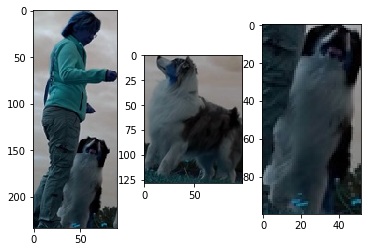

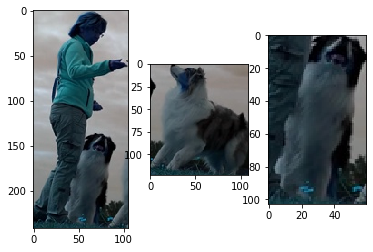

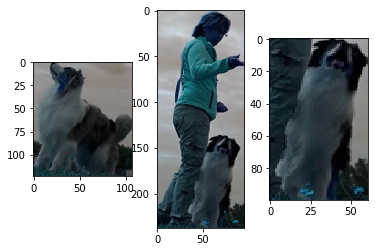

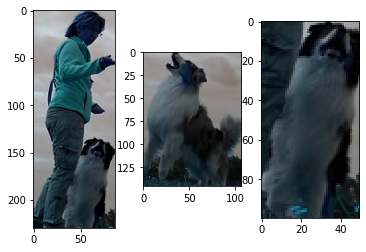

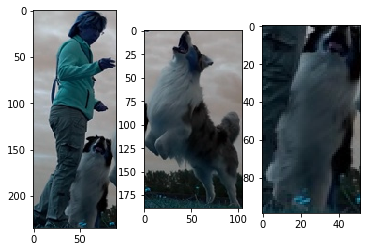

In [6]:
from torch.utils.data import Dataset
import numpy as np
import json
import matplotlib.pyplot as plt

class DavisDataset(Dataset):

    def __init__(self, memmap, json_data):

        ##cropping objects from memaps and add to idxes
        self.memmap = memmap
        self.json_data = json_data
        self.idxes = {}
        self.max_no_classes = 0

        imgs = self.json_data['imgs']
        for img in imgs:
            idx = int(img['index'])
            classes = img['objects']
            classes_ = []
            objects_ = []
            class_objects = []
            for class_idx, class_ in enumerate(classes):
                single_class = class_['class']
                x = class_['x']
                y = class_['y']
                width = class_['width']
                height = class_['height']

                if class_idx > self.max_no_classes:
                    self.max_no_classes = class_idx

                image = self.memmap[idx]
                crop_img = image[y:y + height, x:x + width]
                classes_.append(single_class)
                objects_.append(crop_img)
            class_objects.append(classes_)
            class_objects.append(objects_)
            self.idxes[idx] = class_objects

    def __len__(self):
        return len(self.memmap)

    def __getitem__(self, index):
        classes, images = self.idxes.get(index)
        return classes, images


#loading memmap
folder_path = './'
complete_shape=(66,480,854,3)
complete_memmap = folder_path+'imgmemmap'
newfp = np.memmap(complete_memmap, dtype='uint8', mode='r', shape=complete_shape)


#loading json
with open('datajson-d.txt') as json_file:
    data_json = json.load(json_file)


def show_objects(images):
  img_np_0 = np.asarray(images[0])
  img_np_1 = np.asarray(images[1])
  img_np_2 = np.asarray(images[2])

  f, axarr = plt.subplots(1, 3)
  axarr[0].imshow(img_np_0, interpolation='nearest')
  axarr[1].imshow(img_np_1, interpolation='nearest')
  axarr[2].imshow(img_np_2, interpolation='nearest')
  plt.show()

siamese = DavisDataset(newfp, data_json)
for i in range(5):
  classes, images  = siamese.__getitem__(i)
  show_objects(images)


